<a href="https://colab.research.google.com/github/JahnaviM737/Data-Science-ML-GRIP/blob/master/T02_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 02 : K-MEANS CLUSTERING
### UNSUPERVISED LEARNING
By Jahnavi Mulchandani

### GATHERING DATA

In [54]:
# Importing Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [55]:
# Import csv data
data = datasets.load_iris() # This returns a dictionary
col_names = ['sepal_len_cm', 'sepal_width_cm', 'petal_len_cm', 'petal_width_cm']
data_df = pd.DataFrame(data['data'], columns=col_names)
data_df.head()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### PREPARING FEATURE VECTOR

In [56]:
# Generating feature vector x
X = data_df.iloc[:,:].values # values converts it into arrays

### ELBOW METHOD FOR DETERMINING 'K'

In [57]:
# K-means algorithm on a range of k values
from sklearn.cluster import KMeans

""" 
K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. 
It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across 
one cluster. A good model is one with low inertia AND a low number of clusters ( K ). 
"""
inertias = [] #Within cluster sum of squares
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(X)
  inertias.append(model.inertia_)

print(inertias)

[681.3706, 152.3479517603579, 78.851441426146, 57.25600931571816, 46.446182051282065, 39.066035353535355, 34.57242002200699, 30.06459307359308, 27.86291131237185, 26.392494645705177]


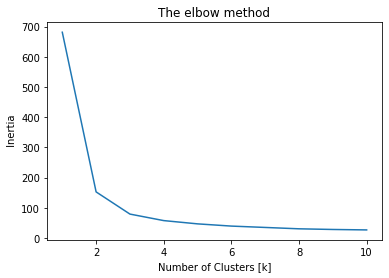

In [58]:
# Plotting line grapn for inertias [THE ELBOW METHOD]
plt.plot(range(1,11), inertias)
plt.xlabel("Number of Clusters [k]")
plt.ylabel(" Inertia")
plt.title("The elbow method")
plt.show()

### FINAL K-MEANS MODEL 

In [59]:
# We choose the number of clusters as 3, since that is where the elblow occurs
model = KMeans(n_clusters = 3)
model.fit(X)
y_kmeans = model.fit_predict(X)
print(y_kmeans)
centroids = model.cluster_centers_
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


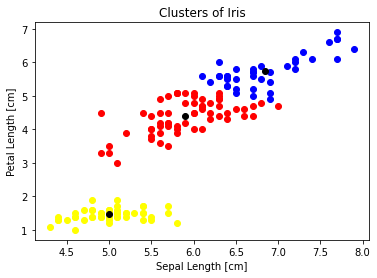

In [60]:
# Scatter Plot
plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0, 2], c = 'red') # Rows for which cluster val == 0 ; cols 0 and 2
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1, 2], c = 'yellow') # Rows for which cluster val == 1 ; cols 0 and 2
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2, 2], c = 'blue') # Rows for which cluster val == 2 ; cols 0 and 2
plt.scatter(centroids[:,0], centroids[:,2], c = "black", label = "centroids")
plt.xlabel("Sepal Length [cm]")
plt.ylabel("Petal Length [cm]")
plt.title("Clusters of Iris")
plt.show()